In [1]:
pacman::p_load("MASS", "epiDisplay", 'tidyverse')

In [12]:
glimpse(mammals)

Rows: 62
Columns: 2
$ body  <dbl> 3.385, 0.480, 1.350, 465.000, 36.330, 27.660, 14.830, 1.040, ...
$ brain <dbl> 44.50, 15.50, 8.10, 423.00, 119.50, 115.00, 98.20, 5.50, 58.0...


,Var. name,obs.,mean,median,s.d.,min.,max.
1,body,62,198.79,3.34,899.16,0,6654
2,brain,62,283.13,17.25,930.28,0.14,5712


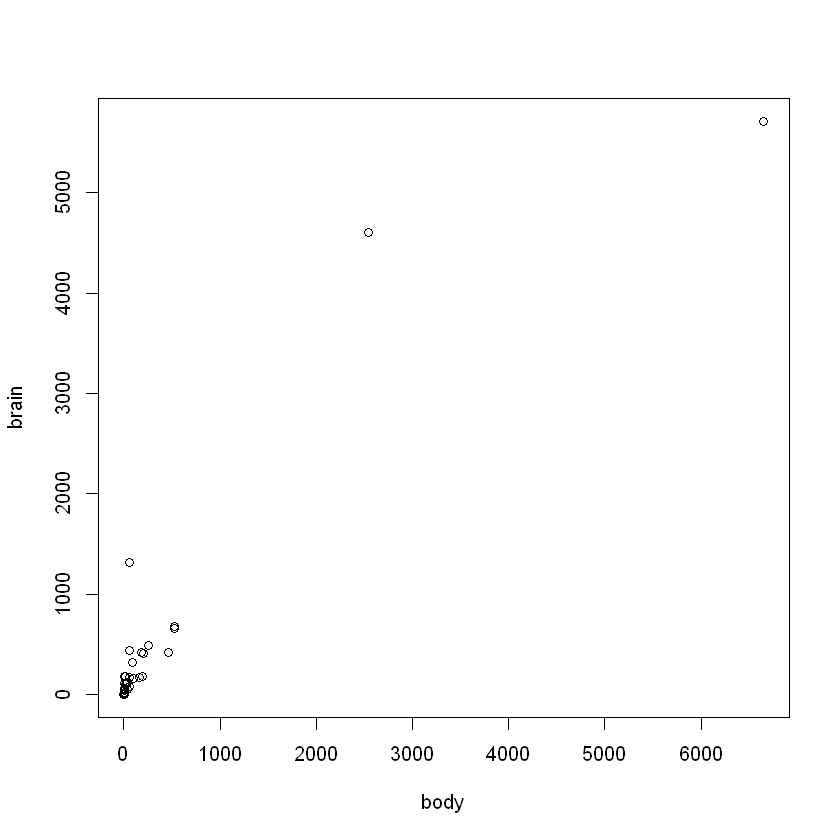

In [18]:
### There are two data points which look like outliers. 
### The difference between mean and median is far large.
plot(mammals)
summ(mammals)

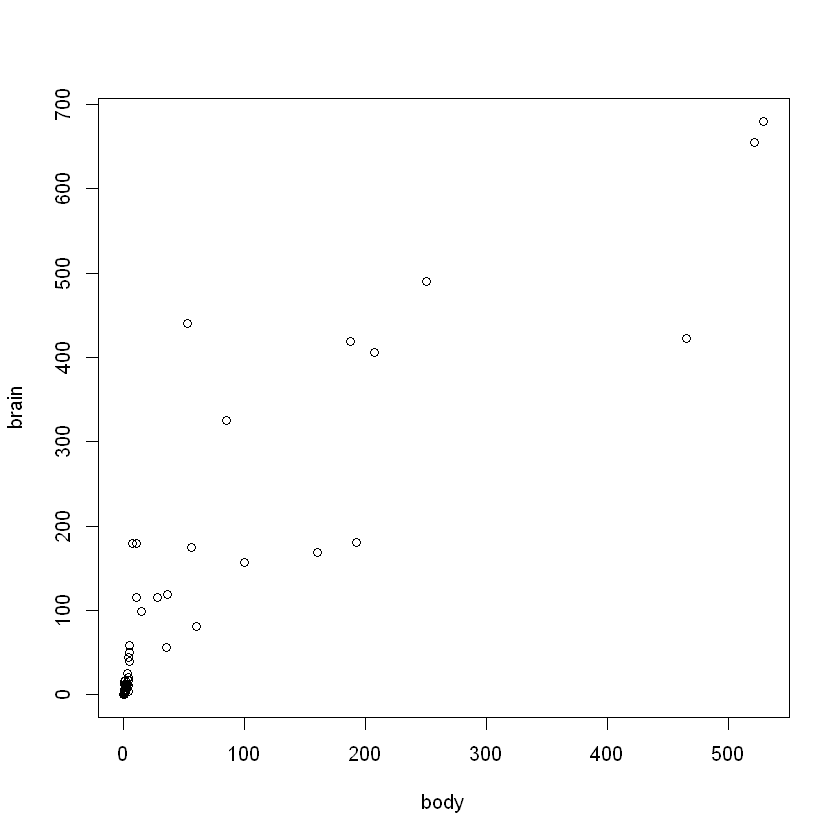

In [21]:
mammals %>% filter(body <= 1000 & brain <= 1000)  %>% plot

In [24]:
### The residuals results indicates that it does not seem right. too big residuals and median is not close to 0
slm <- lm(brain ~ body, data=mammals)
summary(slm)


Call:
lm(formula = brain ~ body, data = mammals)

Residuals:
    Min      1Q  Median      3Q     Max 
-810.07  -88.52  -79.64  -13.02 2050.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.00440   43.55258    2.09   0.0409 *  
body         0.96650    0.04766   20.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 334.7 on 60 degrees of freedom
Multiple R-squared:  0.8727,	Adjusted R-squared:  0.8705 
F-statistic: 411.2 on 1 and 60 DF,  p-value: < 2.2e-16


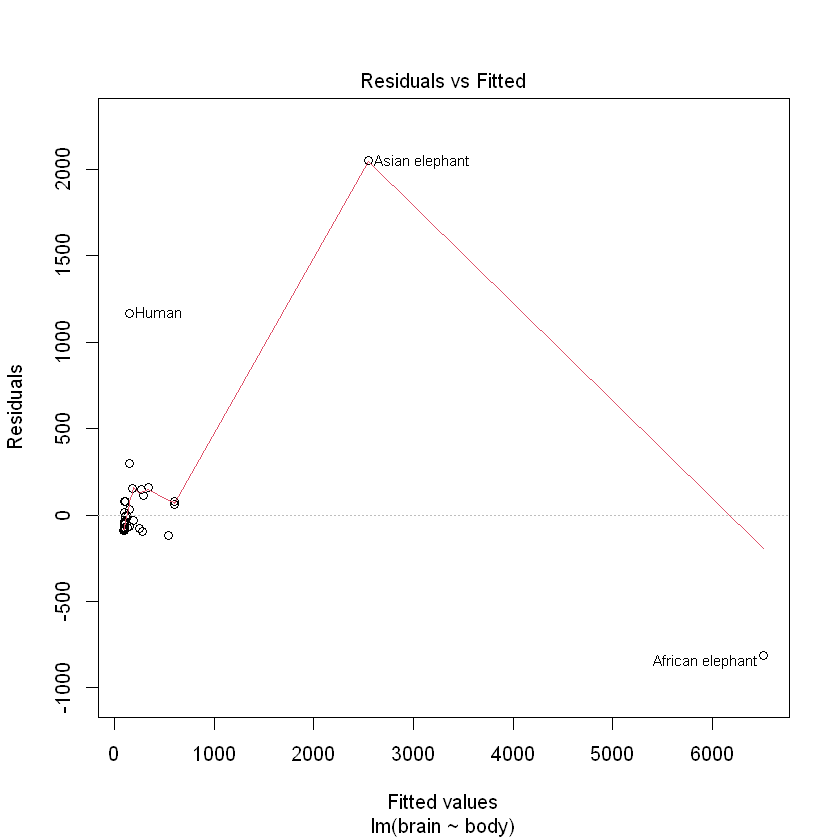

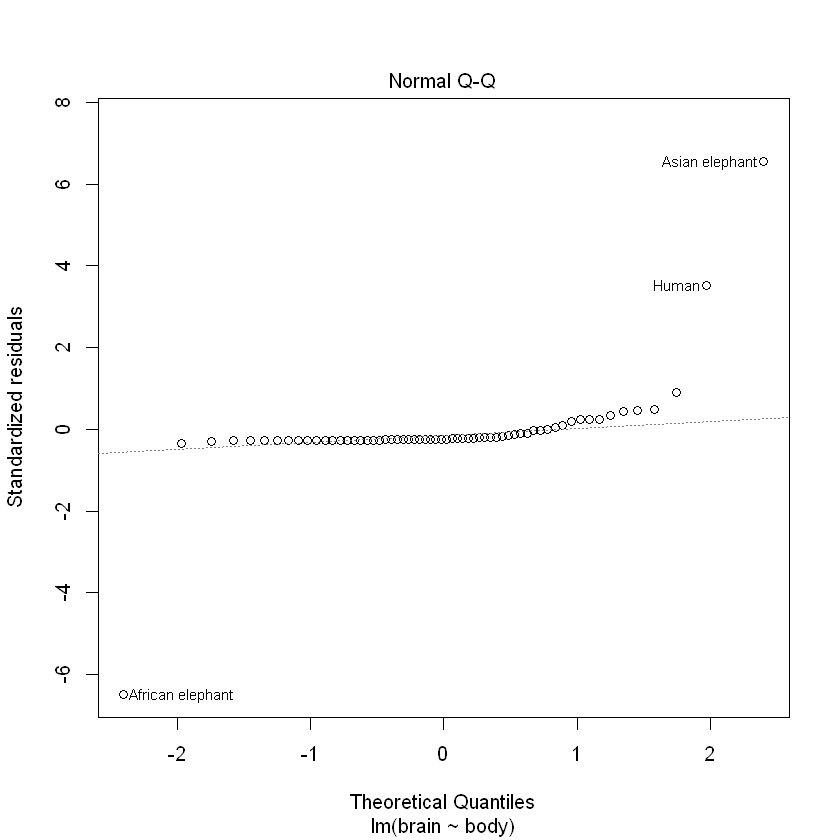

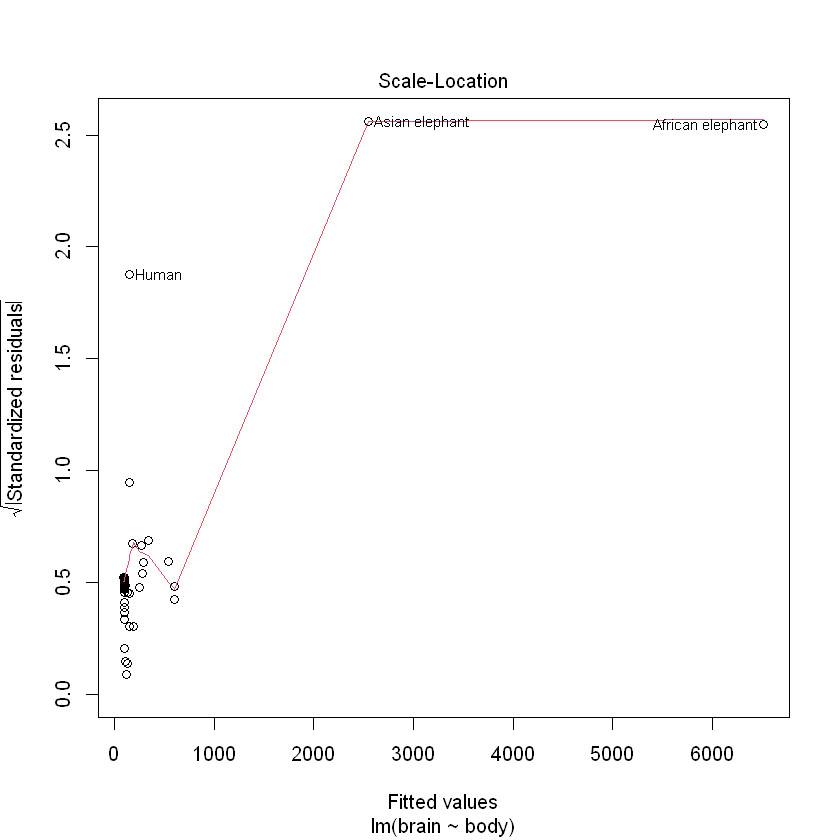

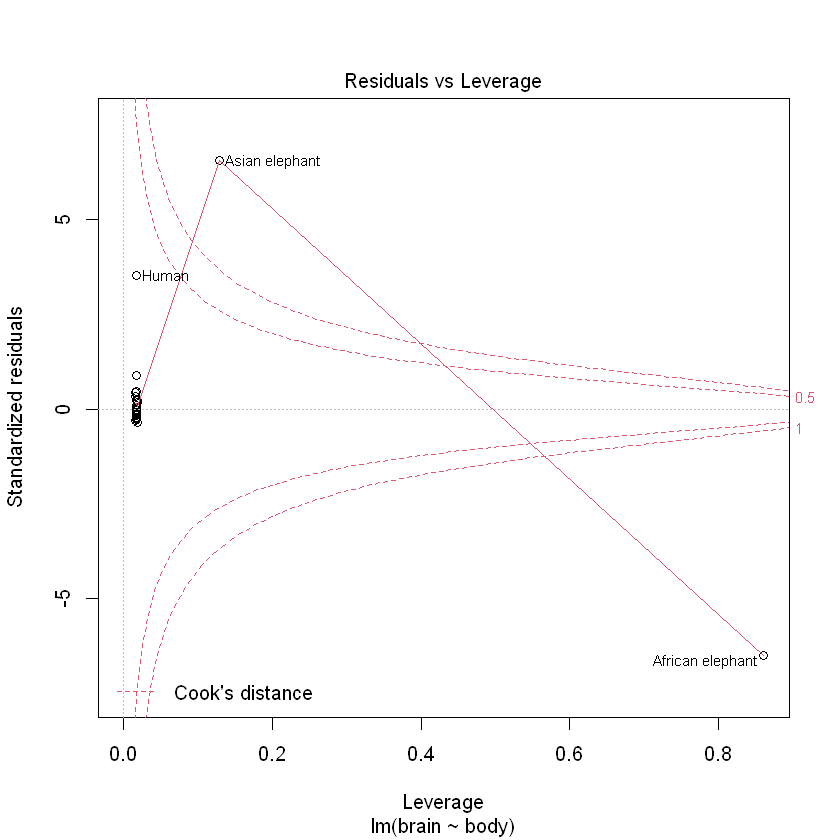

In [26]:
### Diagnosis of regression
### The error is not nomal distribution and the variance of error is not constant.

plot(slm)

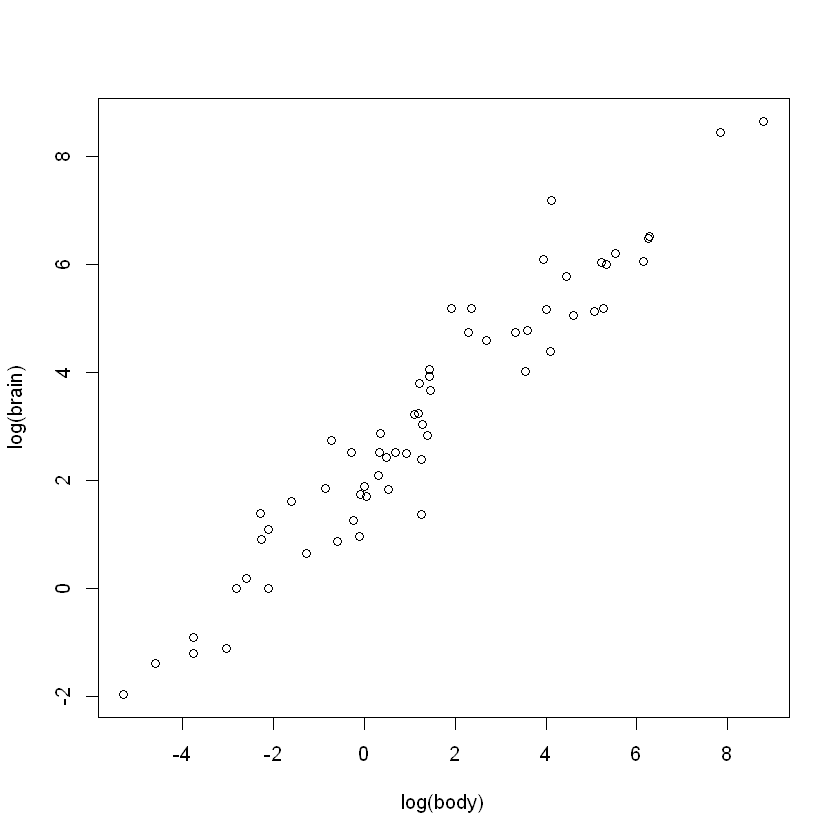

In [30]:
### log transformation
### It seems now that there is a linear relationship.
plot(log(brain) ~ log(body), data=mammals)

In [31]:
### the residuals result looks better
slm.ln <- lm(log(brain) ~ log(body), data=mammals)
summary(slm.ln)


Call:
lm(formula = log(brain) ~ log(body), data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71550 -0.49228 -0.06162  0.43597  1.94829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.13479    0.09604   22.23   <2e-16 ***
log(body)    0.75169    0.02846   26.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6943 on 60 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9195 
F-statistic: 697.4 on 1 and 60 DF,  p-value: < 2.2e-16


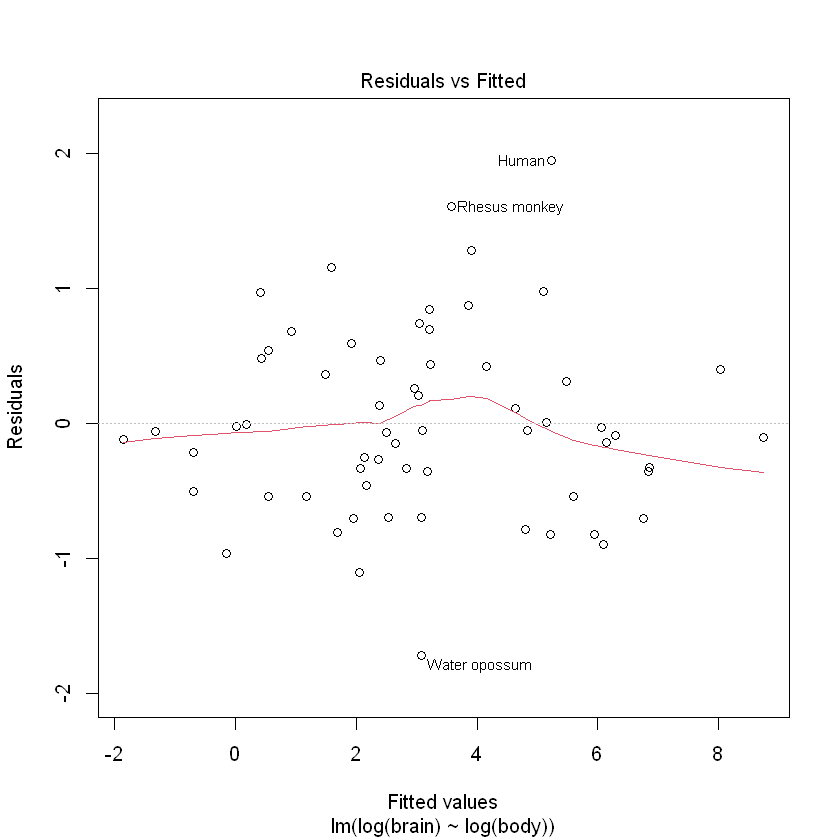

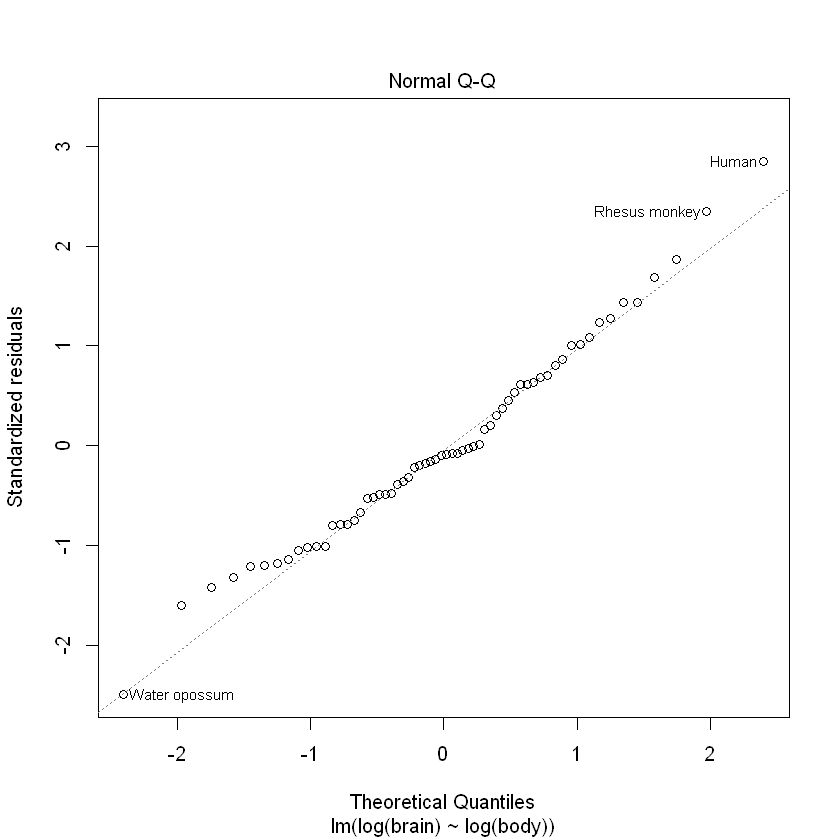

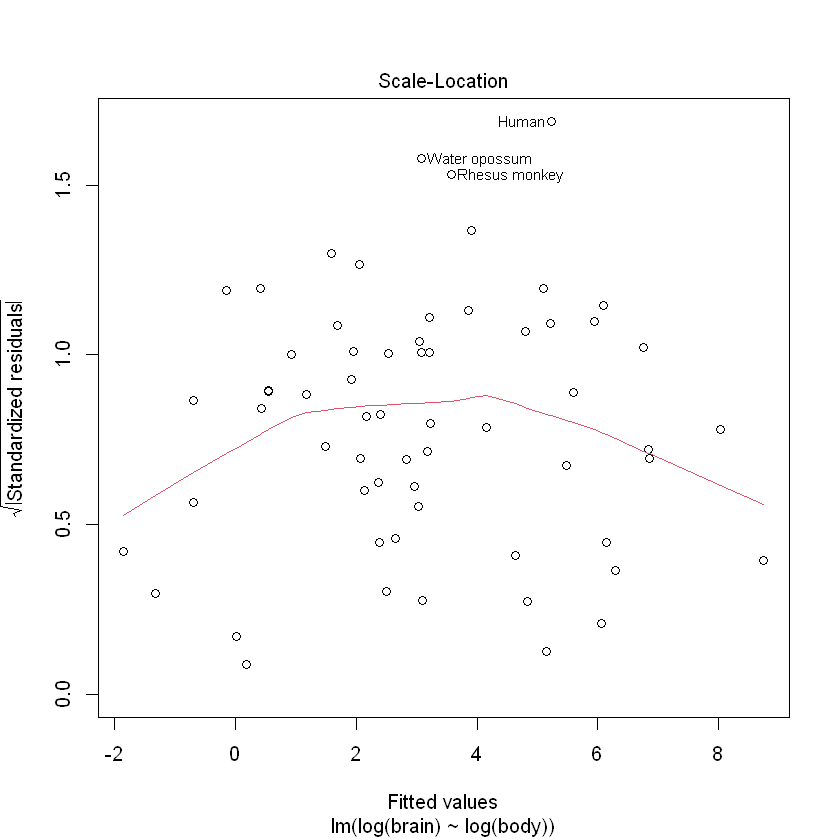

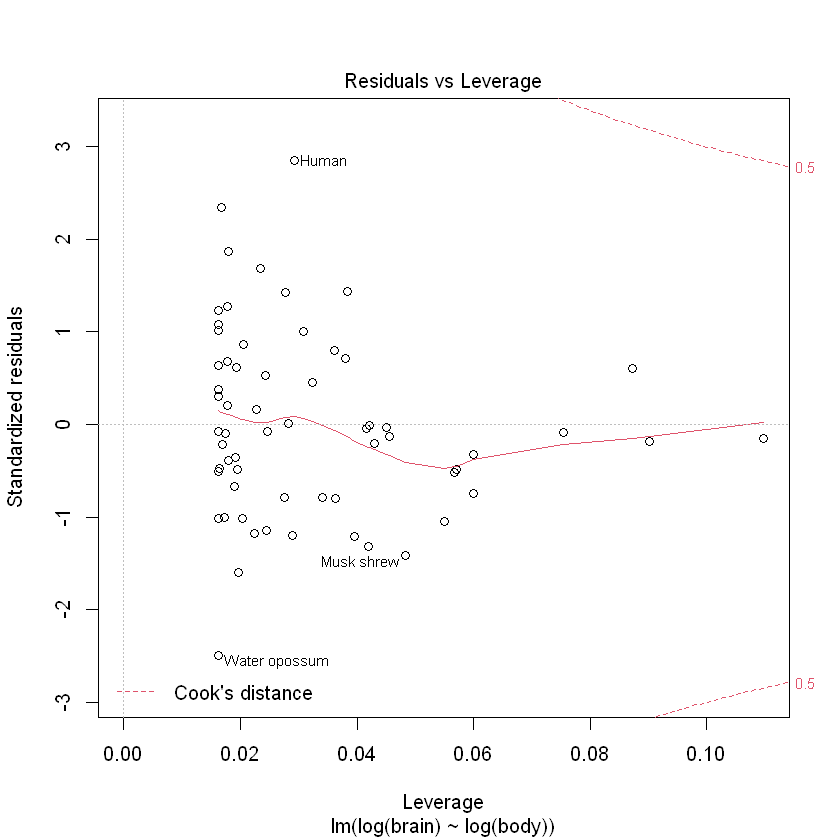

In [32]:
plot(slm.ln)

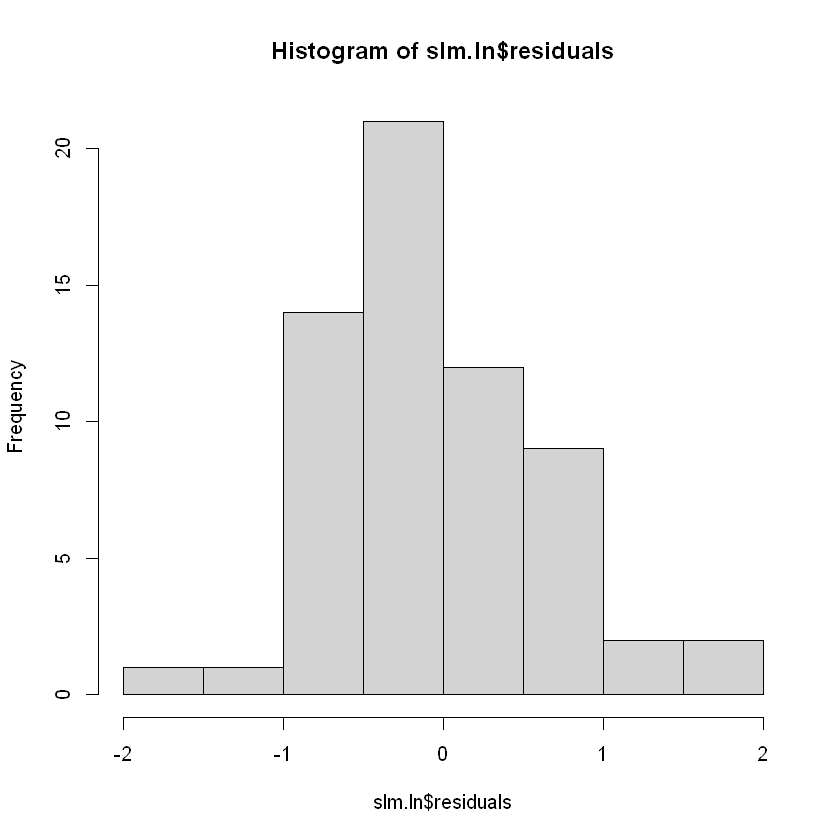

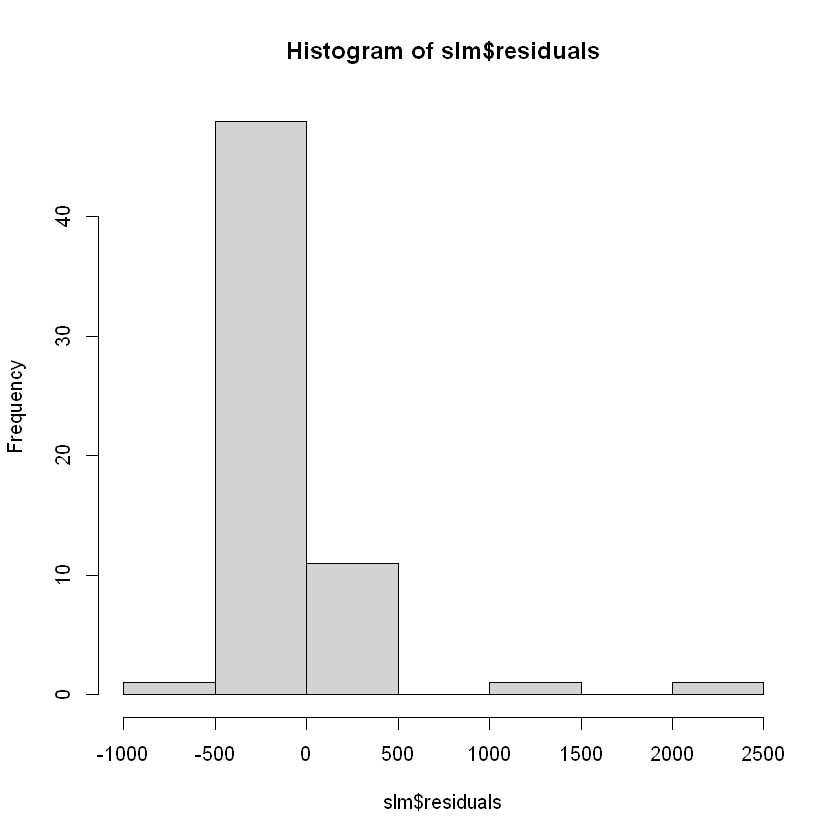

In [34]:
hist(slm.ln$residuals); hist(slm$residuals)

### Another example

In [7]:
## ignore comment line starting with ##
age.df <- read_csv("Data/WeightData.csv", comment ="#")
head(age.df)

Parsed with column specification:
cols(
  age = col_double(),
  weight = col_double(),
  height = col_double(),
  gender = col_double()
)



age,weight,height,gender
<dbl>,<dbl>,<dbl>,<dbl>
48,25,37,1
9,24,26,2
133,100,56,2
56,45,40,2
44,33,38,2
28,35,39,2


In [35]:
### the maximum of age is 144, which doesn't seem right.
summ(age.df)

,Var. name,obs.,mean,median,s.d.,min.,max.
1,age,300,49.68,34.5,43.07,2,144
2,weight,300,41.5,32,30.26,7,175
3,height,300,37.38,36,11.76,17,78
4,gender,300,1.52,2,0.5,1,2


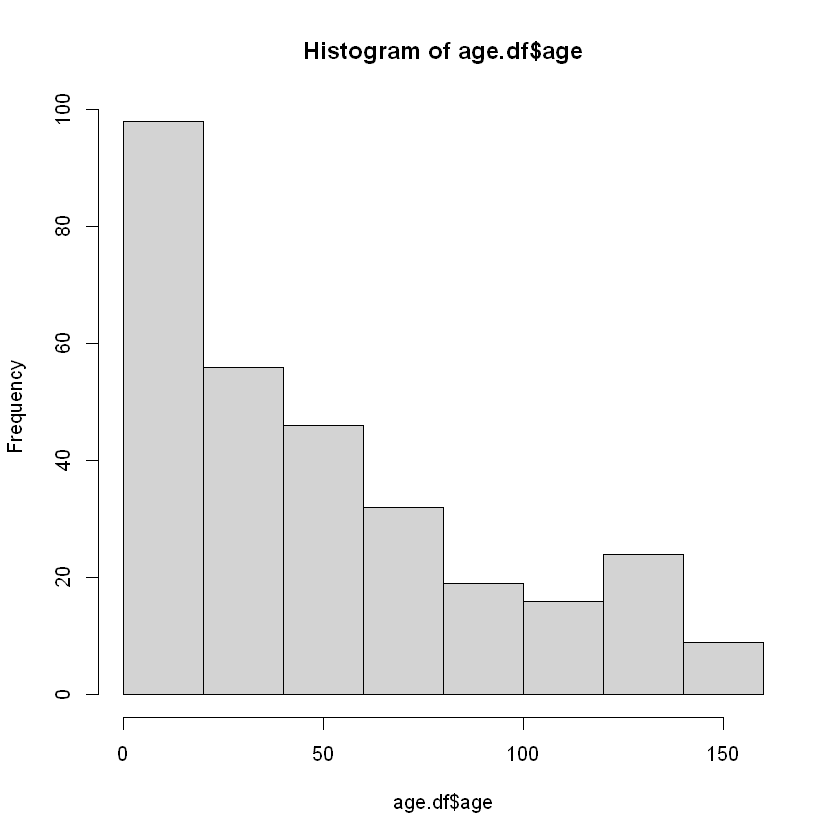

In [9]:
hist(age.df$age)

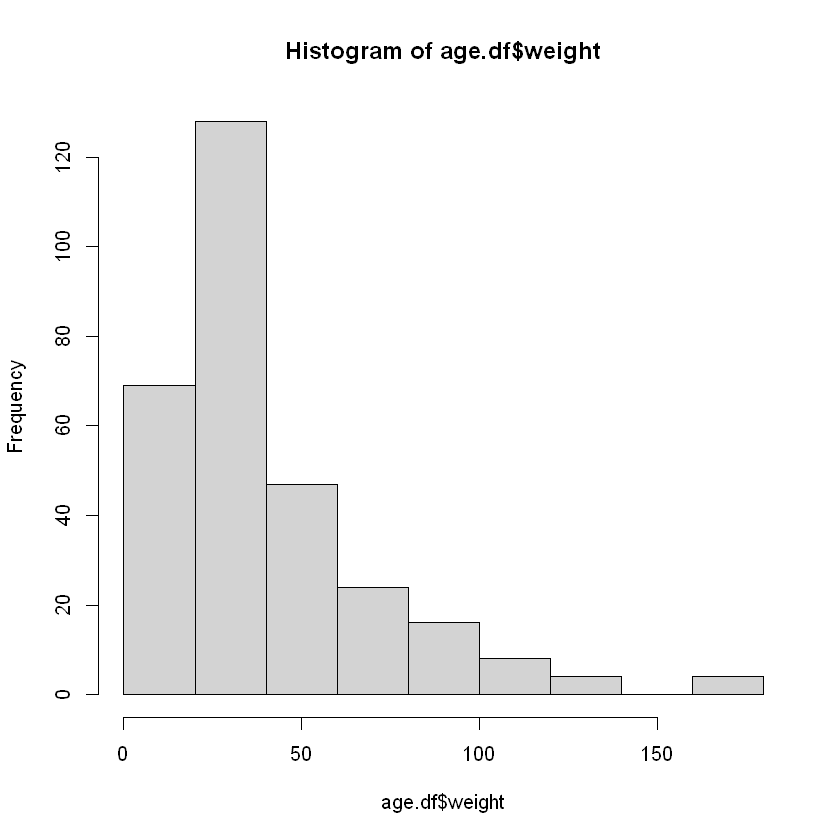

In [10]:
hist(age.df$weight)

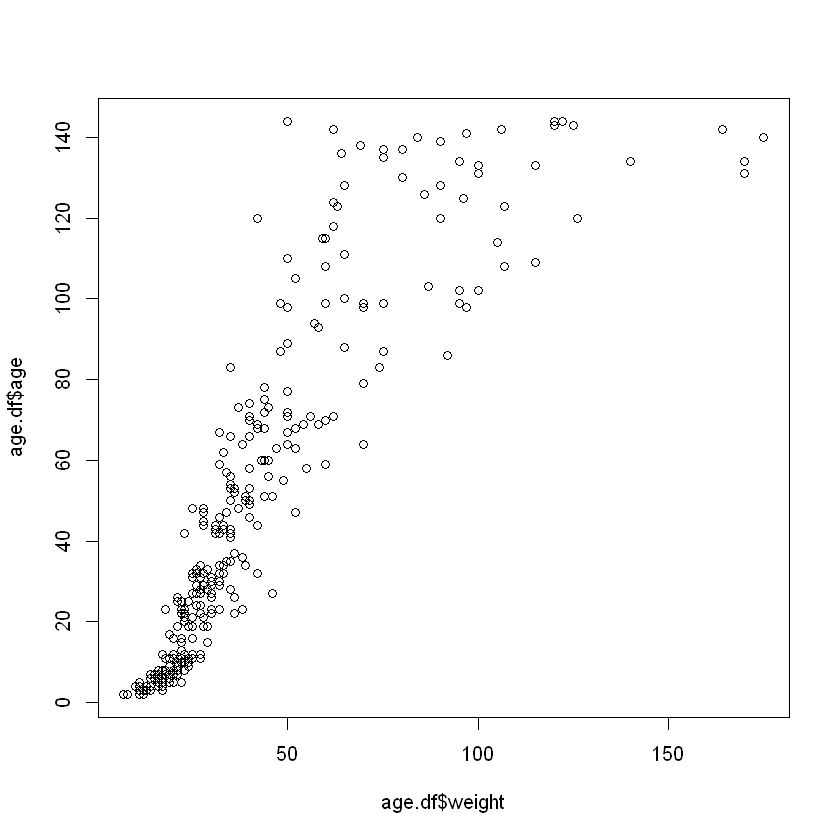

In [11]:
plot(age.df$weight, age.df$age)

Those variables are right-skewed. log transformation would be a good idea.  
Variation increases as the age variable goes up.

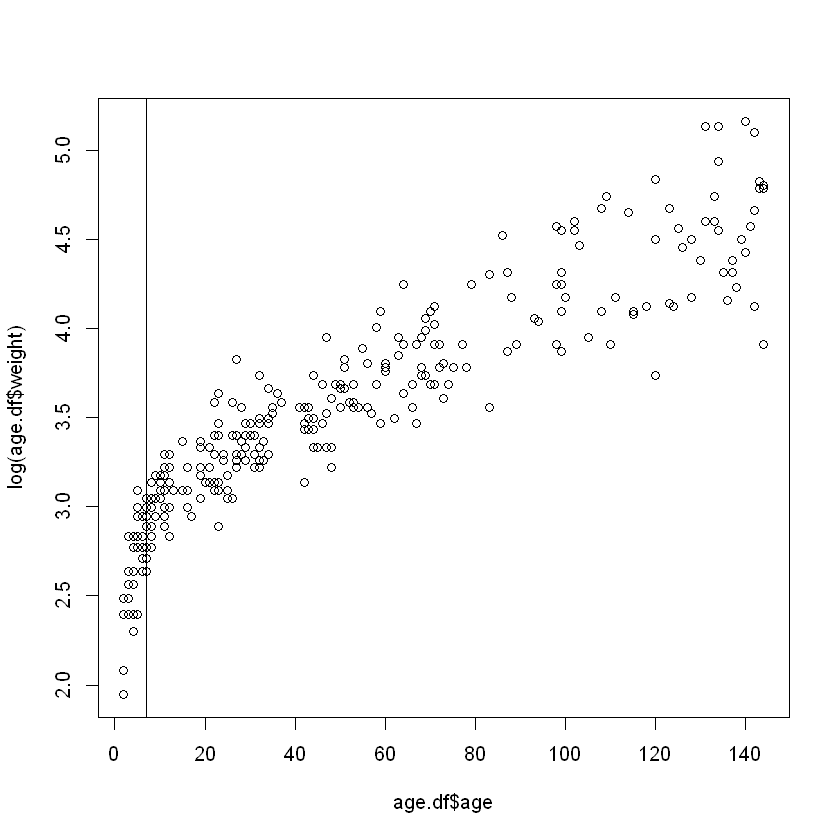

In [38]:
plot(log(age.df$weight) ~ age.df$age)
abline(v=7)

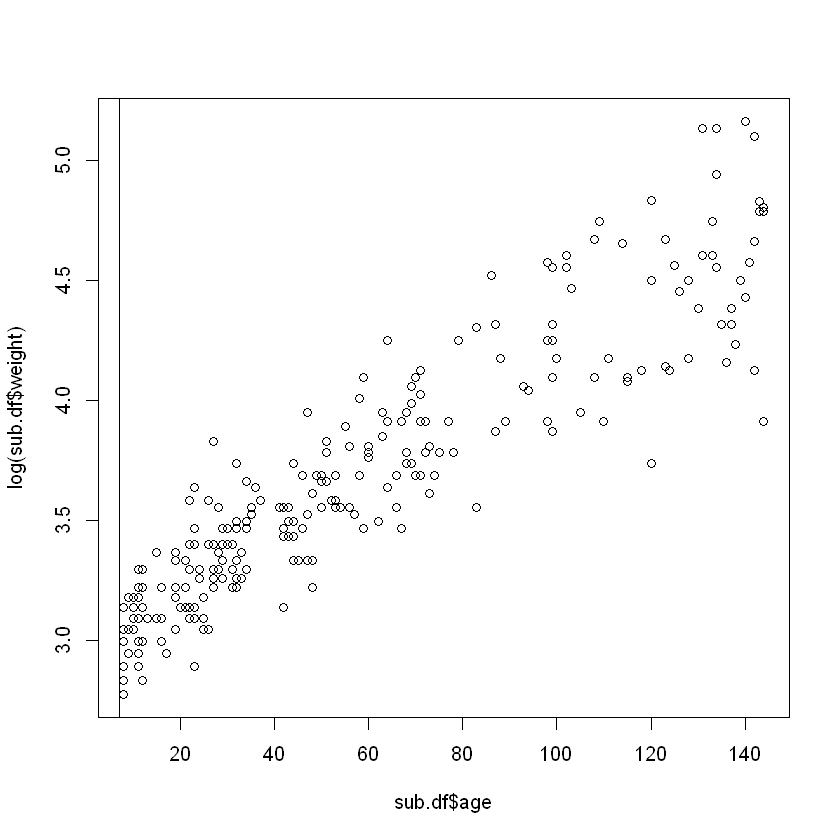

In [41]:
### Remove age < 7. it looks like there is a different pattern over there
sub.df <- age.df %>% filter(age > 7)
plot(log(sub.df$weight) ~ sub.df$age)
abline(v=7)

In [45]:
ln <- function(x) {log(x)}

### the residuals result seems better
slm.ln <- lm(ln(weight) ~ age, data=sub.df)
summary(slm.ln)


Call:
lm(formula = ln(weight) ~ age, data = sub.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79647 -0.13893 -0.01448  0.12219  0.58289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.9850904  0.0239755  124.51   <2e-16 ***
age         0.0119681  0.0003333   35.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2188 on 248 degrees of freedom
Multiple R-squared:  0.8387,	Adjusted R-squared:  0.8381 
F-statistic:  1290 on 1 and 248 DF,  p-value: < 2.2e-16


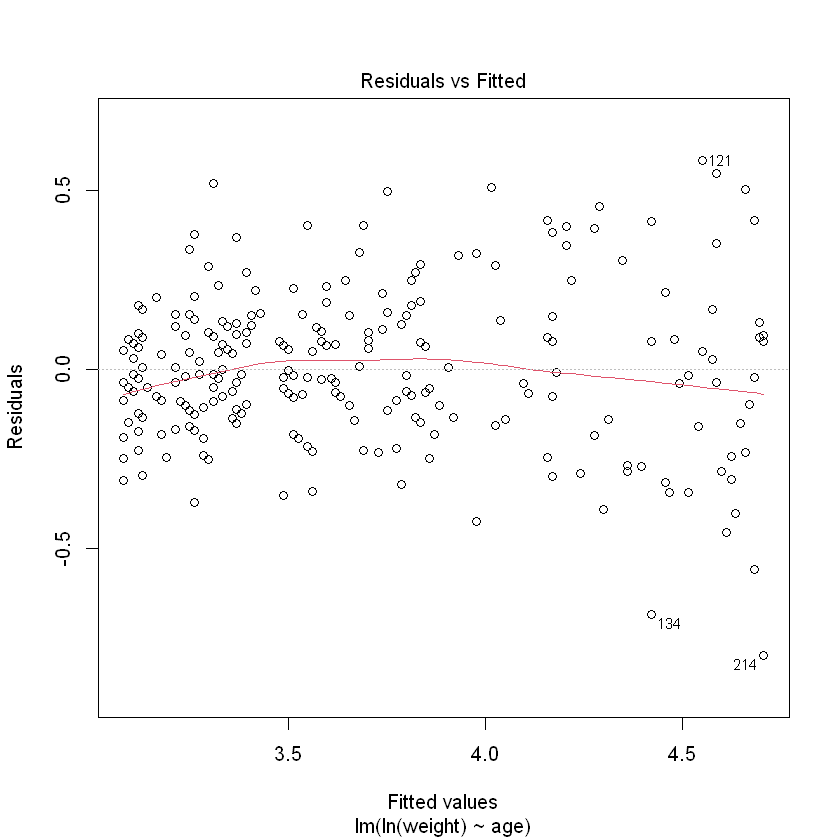

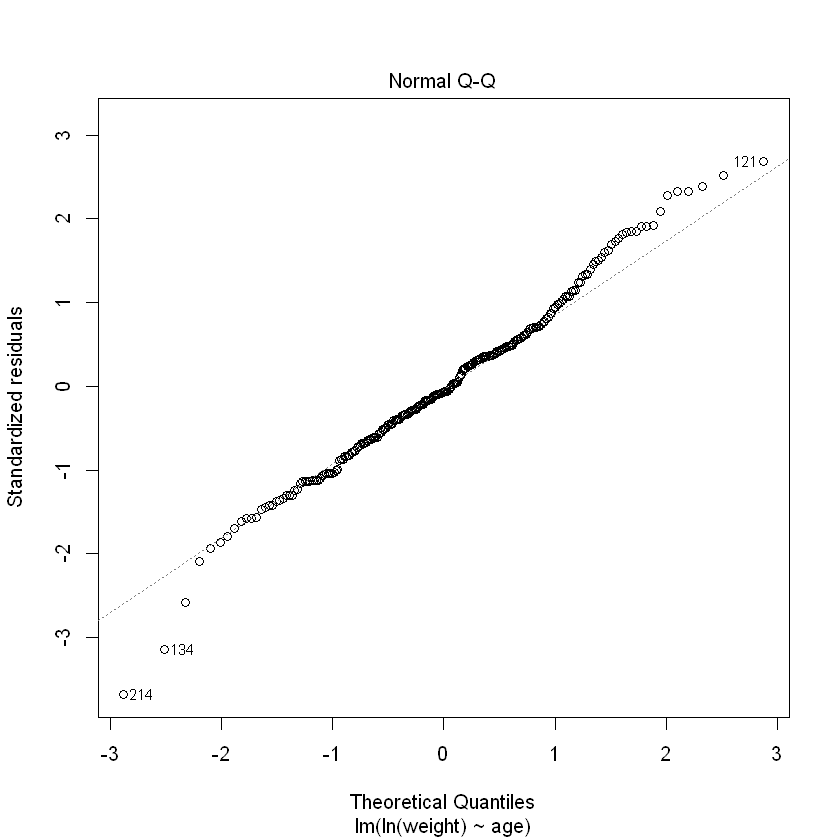

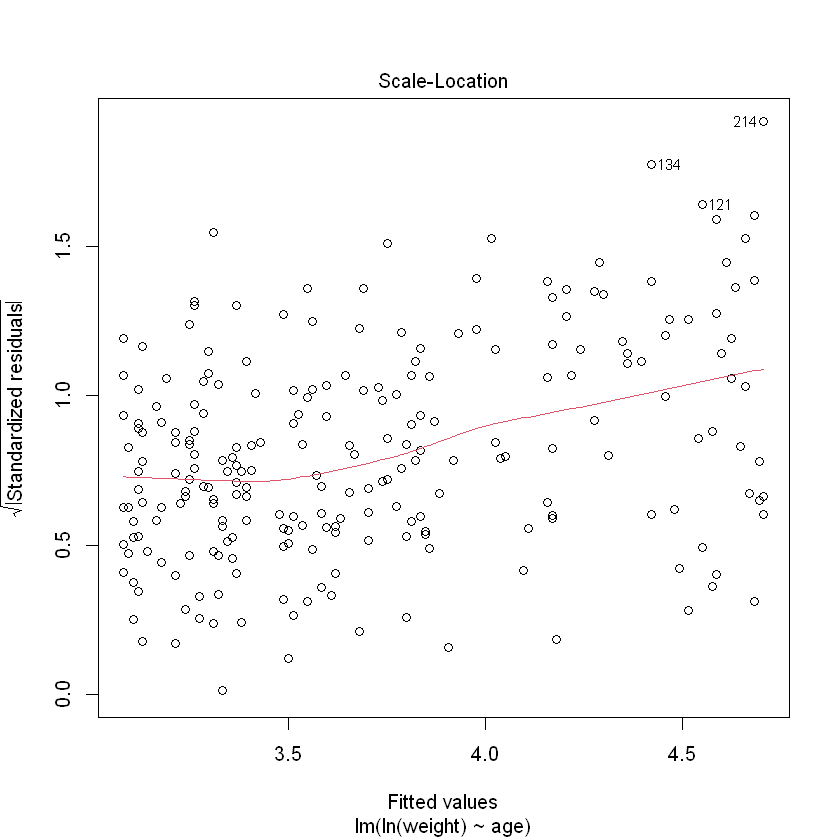

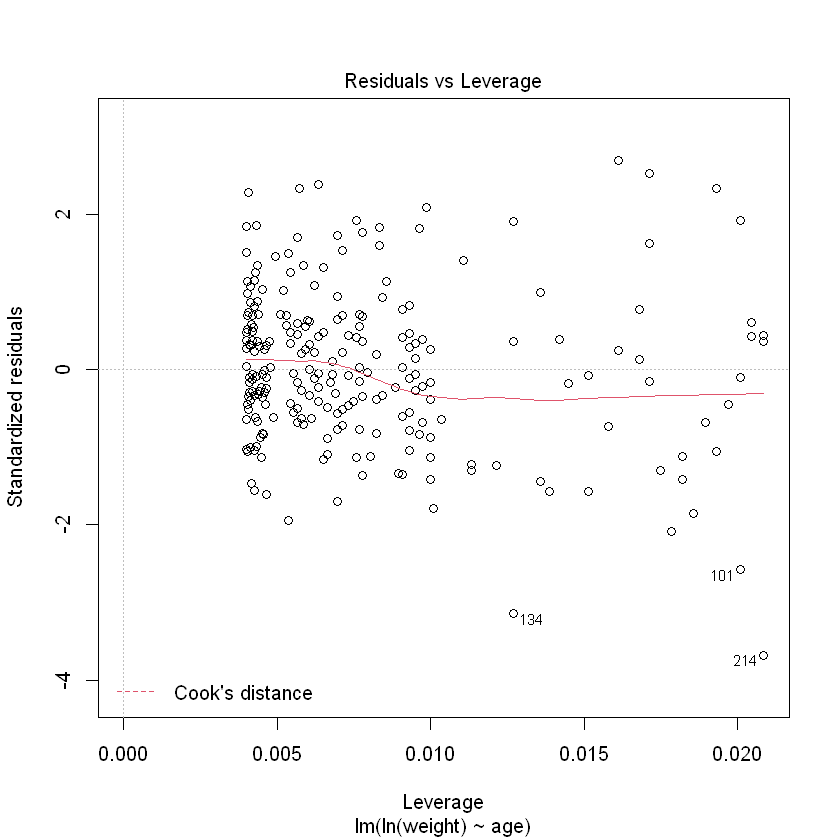

In [46]:
plot(slm.ln)

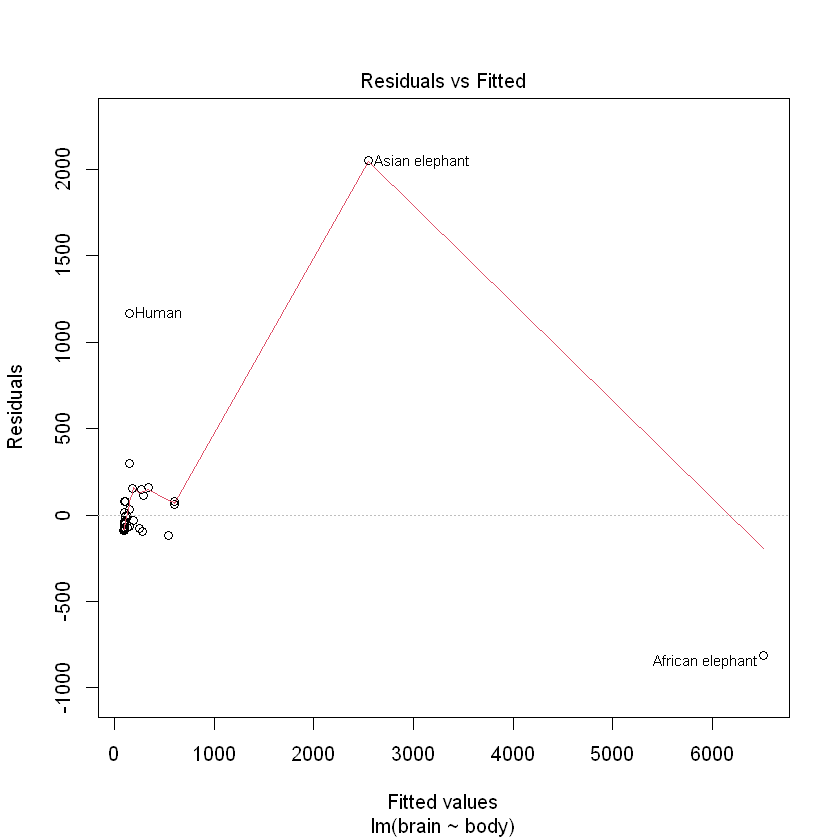

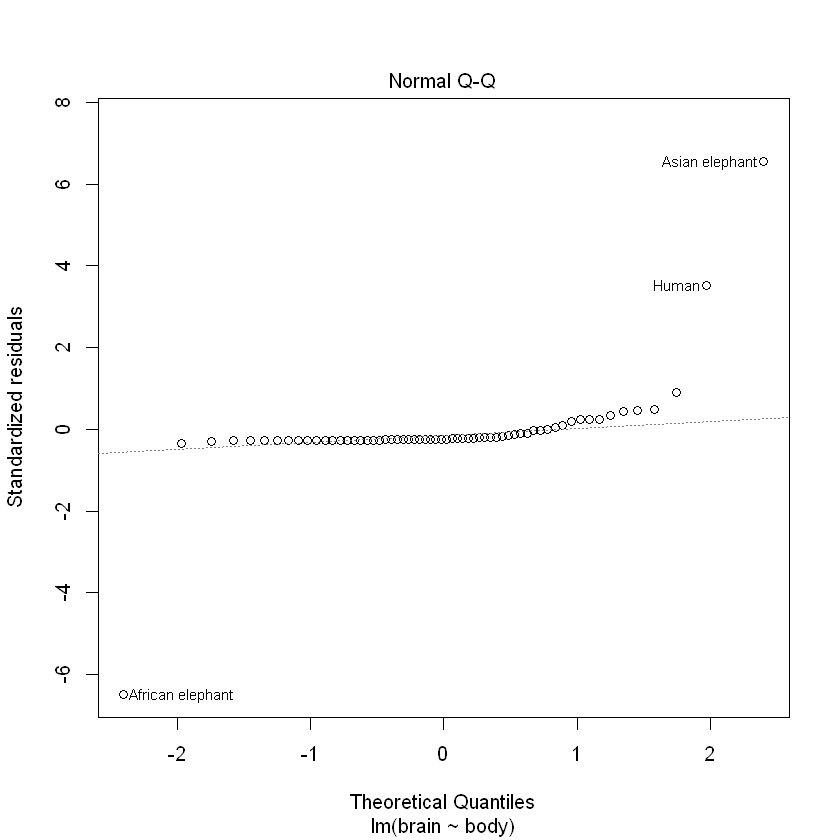

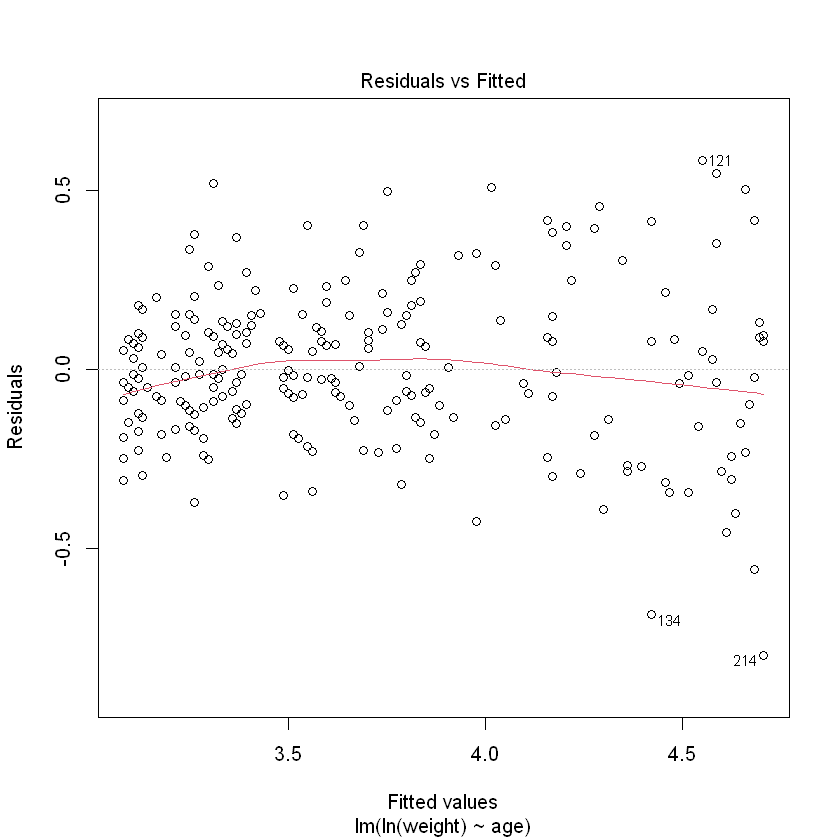

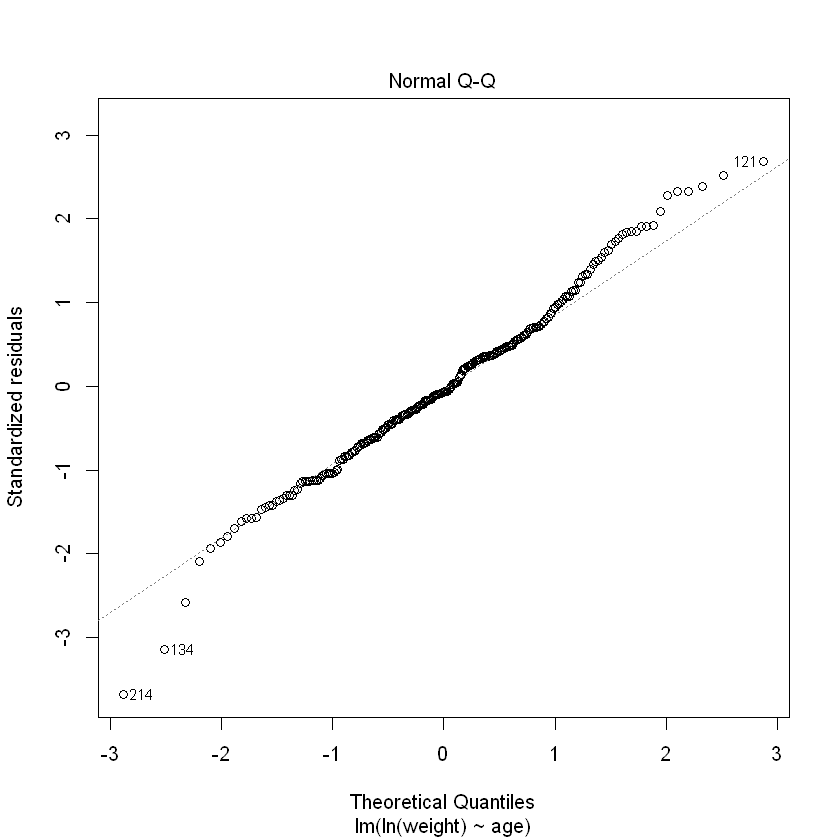

In [47]:
### comparison

plot(slm, which=1:2)
plot(slm.ln, which=1:2)

## Another example

In [56]:
df <- read.csv("Data//BeansData.csv", comment = '#')
head(df)

,pot.size,phos,P.lev,rep,trt,rt.len,ShtDM,RtDM
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,4,210,L,A,a,255.29,0.7962,0.6483
2,4,210,L,B,a,211.42,0.7790,0.7582
3,4,210,L,C,a,265.91,0.9795,0.6995
4,4,210,L,D,a,288.55,1.2228,0.9890
5,4,420,H,A,b,486.60,2.7627,1.7510
6,4,420,H,B,b,286.06,1.0743,0.6536


In [57]:
summ(df)

,Var. name,obs.,mean,median,s.d.,min.,max.
1,pot.size,24,8,8,3.34,4,12
2,phos,24,192.5,175,116.31,70,420
3,P.lev,,,,,,
4,rep,,,,,,
5,trt,,,,,,
6,rt.len,24,301.32,280.43,109.96,146.18,521.66
7,ShtDM,24,1.18,1.06,0.56,0.51,2.76
8,RtDM,24,0.87,0.78,0.33,0.47,1.75


In [58]:
glimpse(df)

Rows: 24
Columns: 8
$ pot.size <int> 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12...
$ phos     <int> 210, 210, 210, 210, 420, 420, 420, 420, 105, 105, 105, 105...
$ P.lev    <chr> "L", "L", "L", "L", "H", "H", "H", "H", "L", "L", "L", "L"...
$ rep      <chr> "A", "B", "C", "D", "A", "B", "C", "D", "A", "B", "C", "D"...
$ trt      <chr> "a", "a", "a", "a", "b", "b", "b", "b", "c", "c", "c", "c"...
$ rt.len   <dbl> 255.29, 211.42, 265.91, 288.55, 486.60, 286.06, 442.83, 38...
$ ShtDM    <dbl> 0.7962, 0.7790, 0.9795, 1.2228, 2.7627, 1.0743, 2.5355, 1....
$ RtDM     <dbl> 0.6483, 0.7582, 0.6995, 0.9890, 1.7510, 0.6536, 1.4880, 0....


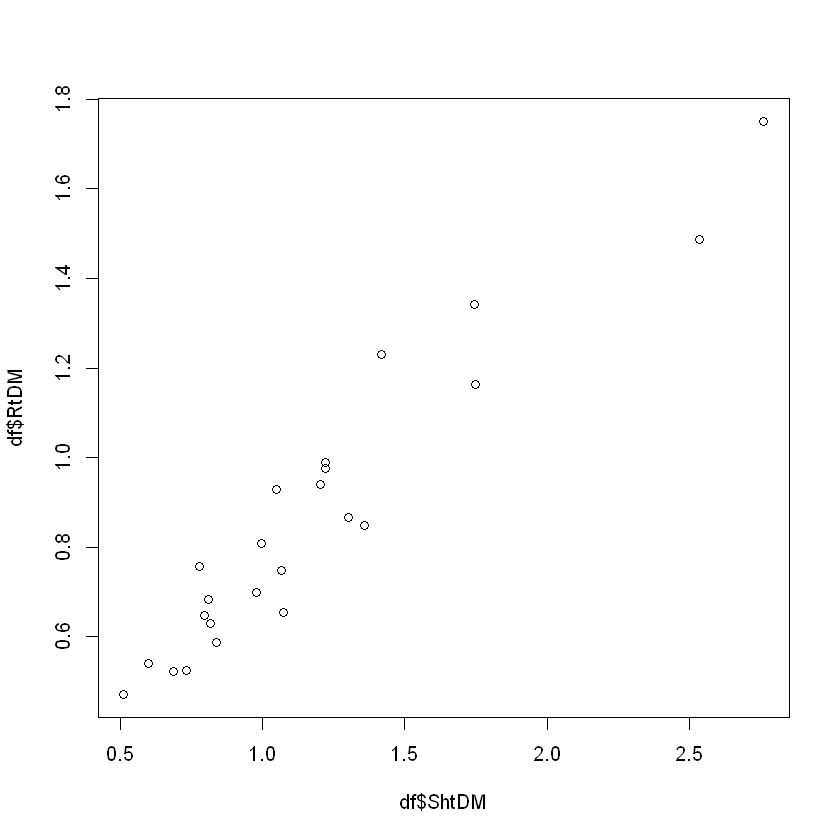

In [61]:
plot(df$RtDM ~ df$ShtDM)

In [64]:
slm <- lm(RtDM ~ ShtDM, data=df)
summary(slm)


Call:
lm(formula = RtDM ~ ShtDM, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15540 -0.06922 -0.01391  0.06373  0.22922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20659    0.04892   4.223  0.00035 ***
ShtDM        0.56075    0.03771  14.872 5.84e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1007 on 22 degrees of freedom
Multiple R-squared:  0.9095,	Adjusted R-squared:  0.9054 
F-statistic: 221.2 on 1 and 22 DF,  p-value: 5.838e-13


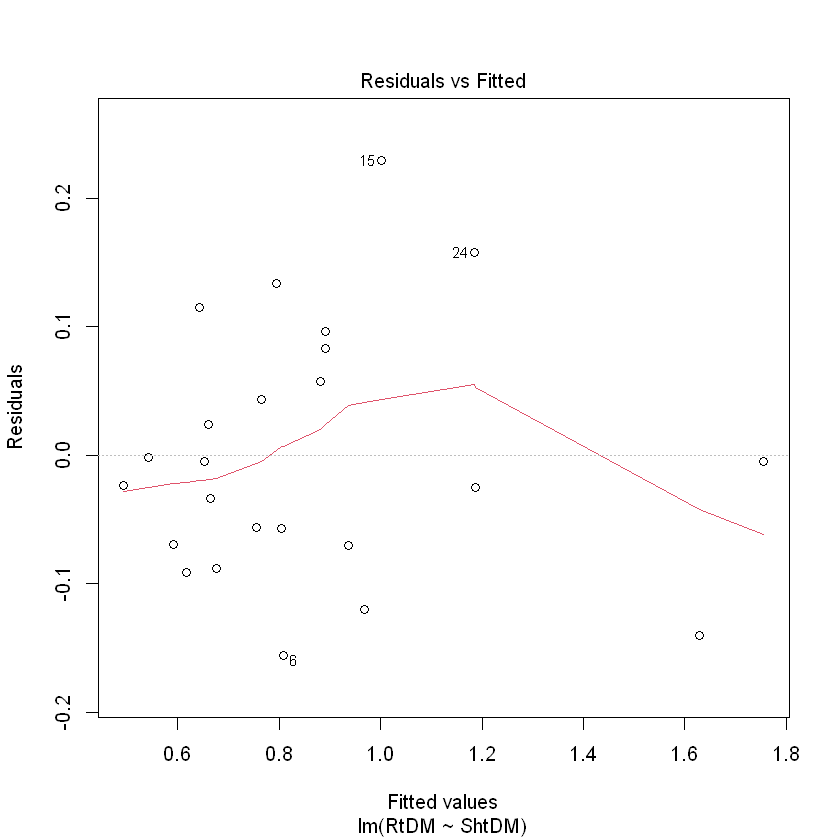

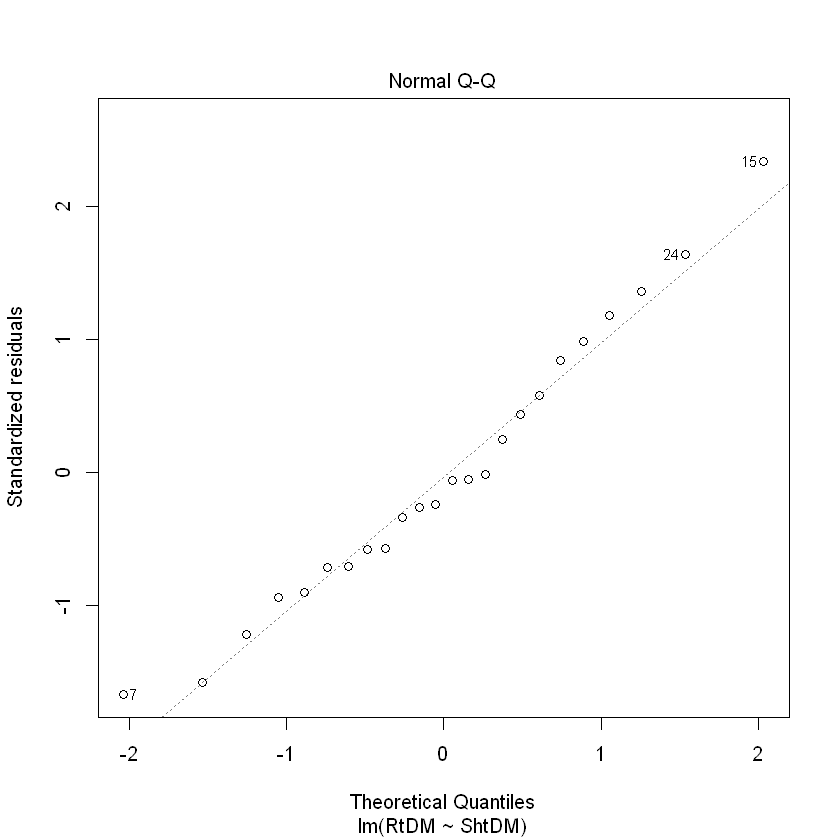

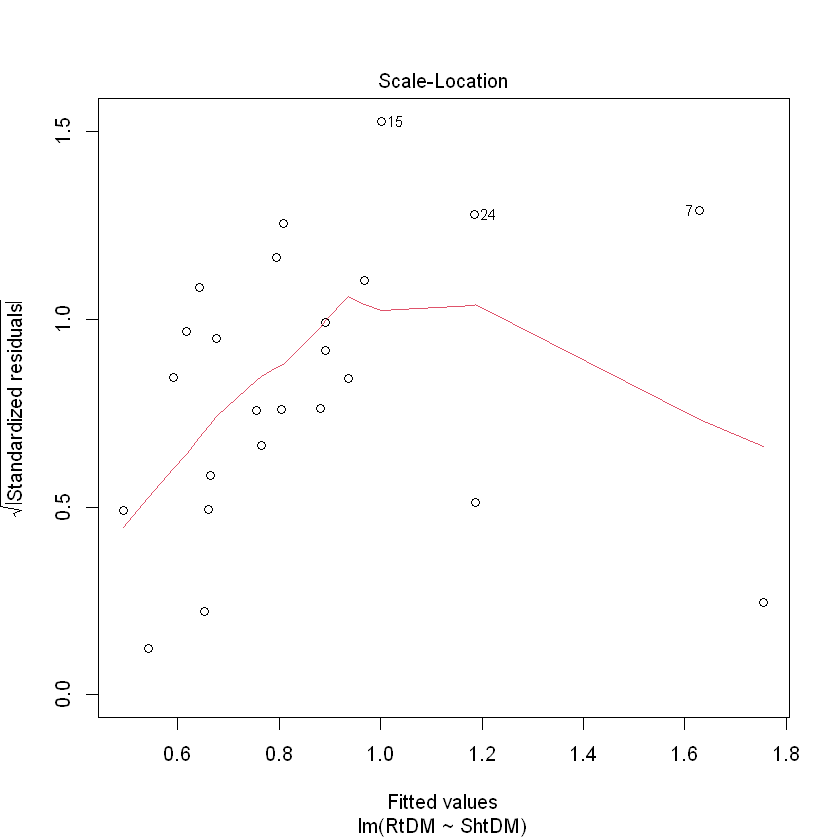

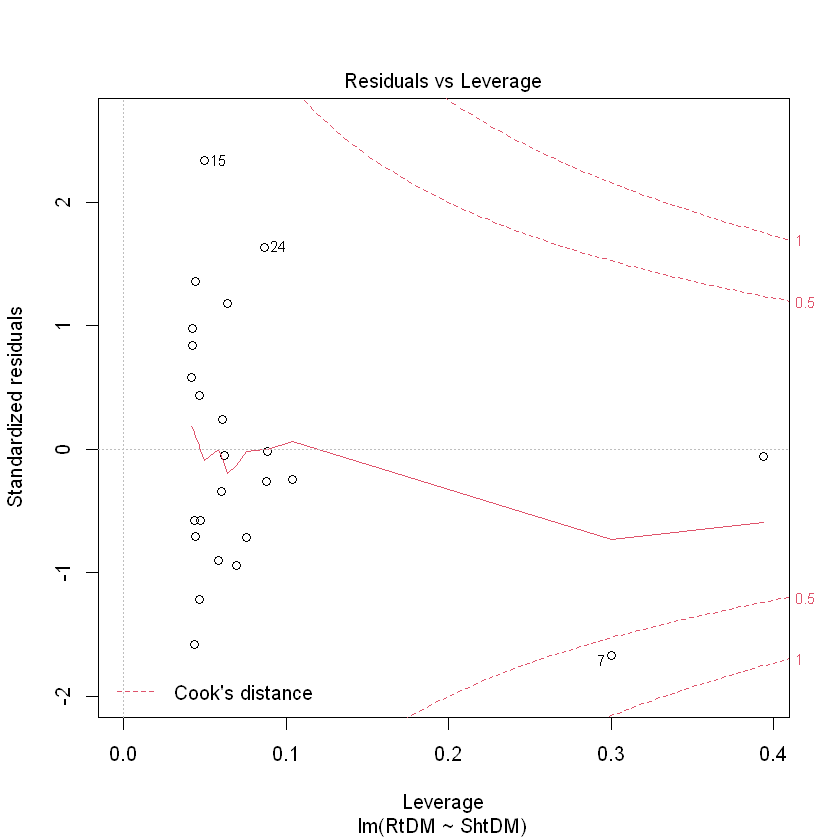

In [65]:
plot(slm)

### The t-value and p-vale in the summary means H0 : B0,B1 = 0, H1 is otherwise.

### Prediction

In [69]:
new.val <- c(2,2.1,2.2,3)

In [70]:
predict(slm, newdata=data.frame(ShtDM=new.val))

1        2        3        4 
1.328088 1.384163 1.440238 1.888837

In [71]:
pred <- predict(slm, newdata=data.frame(ShtDM=new.val))

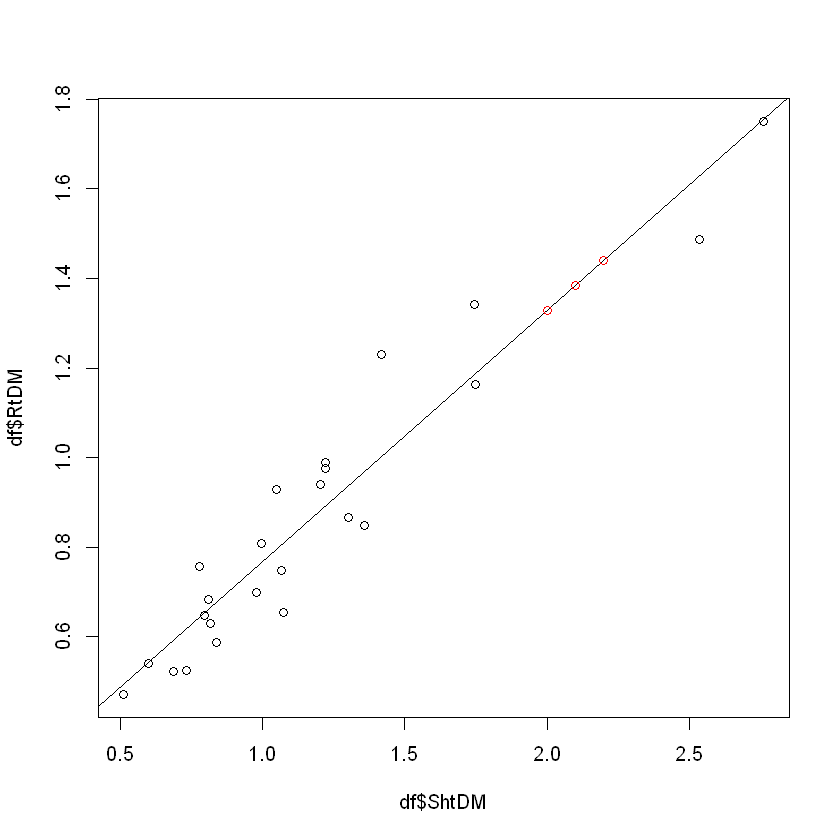

In [72]:
plot(df$RtDM ~ df$ShtDM)
abline(slm)
points(new.val, pred, col='red')

,fit,lwr,upr
1,0.4942547,0.4270534,0.5614560
2,0.5432641,0.4811956,0.6053326
3,0.5919371,0.5346135,0.6492607
4,0.6169465,0.5618943,0.6719988
5,0.6434139,0.5906208,0.6962070
6,0.6530588,0.6010482,0.7050694


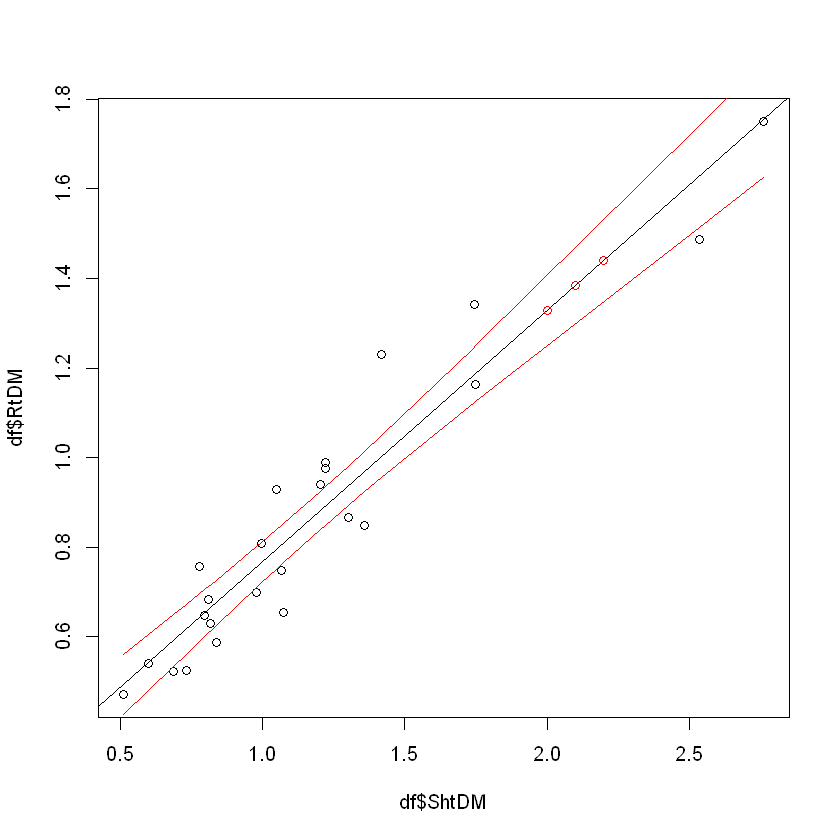

In [80]:
# display confidence interval
plot(df$RtDM ~ df$ShtDM)
abline(slm)
points(new.val, pred, col='red')
ci <- predict(slm, data.frame(ShtDM=sort(df$ShtDM)), level=.95, interval='confidence')
head(ci)
lines(sort(df$ShtDM), ci[,2], col='red')
lines(sort(df$ShtDM), ci[,3], col='red')

,fit,lwr,upr
1,0.4942547,0.2749266,0.7135827
2,0.5432641,0.3254539,0.7610743
3,0.5919371,0.3754313,0.8084430
4,0.6169465,0.4010310,0.8328621
5,0.6434139,0.4280633,0.8587645
6,0.6530588,0.4378986,0.8682189


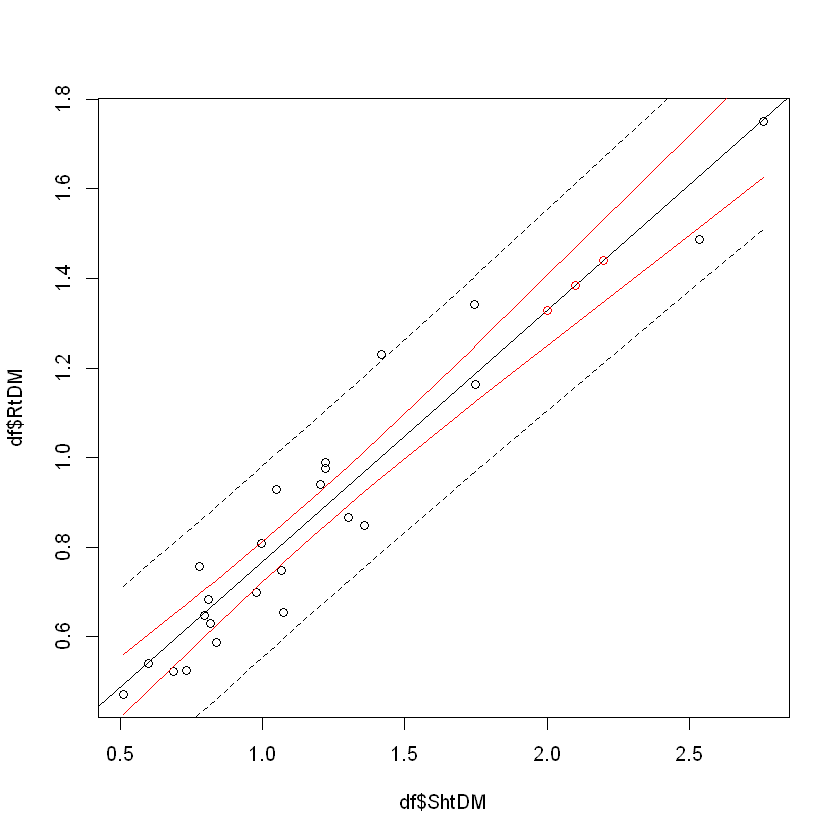

In [81]:
# display prediction confidence interval
plot(df$RtDM ~ df$ShtDM)
abline(slm)
points(new.val, pred, col='red')
prdict <- predict(slm, data.frame(ShtDM=sort(df$ShtDM)), level=.95, interval='prediction')
head(prdict)
lines(sort(df$ShtDM), prdict[,2], lty=2)
lines(sort(df$ShtDM), prdict[,3], lty=2)
lines(sort(df$ShtDM), ci[,2], col='red')
lines(sort(df$ShtDM), ci[,3], col='red')